In [1]:
import math

def creat_data(tlat, dlat, rlng, llng, hres, wres, chunk_size):
    dsts = [{
        "latitude": 49.278801,
        "longitude": -122.920430
    }, 
    {
        "latitude": 49.263059,
        "longitude": -123.251100
    }]
    
    data_chunks = []
    origins = []
    
    for i in range(hres):
        for j in range(wres):
            lat = dlat + i * ((tlat-dlat)/hres)
            lng = llng + j * ((rlng-llng)/wres)
            origins.append((lat, lng))
    
    for i in range(math.ceil(len(origins)/chunk_size)):
        data = {"origins": [], "destinations": dsts, "travelMode": "transit"}
        for j in range(chunk_size):
            ind = i * chunk_size + j
            if ind >= len(origins):
                break
            data["origins"].append({"latitude": origins[ind][0], "longitude": origins[ind][1]})
        data_chunks.append(data)

    return data_chunks

In [2]:
import requests
import json

KEY = 'PUT_YOUR_KEY_HERE'
url = 'https://dev.virtualearth.net/REST/v1/Routes/DistanceMatrix?key={0}'.format(KEY)
tlat, dlat, rlng, llng = 49.294353, 49.182451, -122.817806, -123.263958

data = creat_data(tlat, dlat, rlng, llng, 100, 100, 300)

result = []

for d in data:  
    r = requests.post(url, data=json.dumps(d, ensure_ascii=False))
    json_data = json.loads(r.text)
    result.append(json_data)

In [3]:
points = []
first_dis = {}
second_dis = {}

for r in result:
    ps = []
    for x in r['resourceSets'][0]['resources'][0]['origins']:
        ps.append((x['latitude'], x['longitude']))

    for x in r['resourceSets'][0]['resources'][0]['results']:
        originIndex = x['originIndex']
        dstIndex = x['destinationIndex']
        travelDuration = x['travelDuration']
        ind = len(points) + originIndex
        if dstIndex == 0:
            first_dis[ind] = travelDuration
        else:
            second_dis[ind] = travelDuration
    points.extend(ps)

In [10]:
compact_dict = {}

for i in range(len(points)):
    compact_dict[i] = {'lat': points[i][0],
                       'lng': points[i][1],
                       'sfu_dis': first_dis[i],
                       'ubc_dis': second_dis[i]}

In [14]:
import pickle

def save_obj(obj, name ):
    with open('data/obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
save_obj(compact_dict, 'distance')

In [15]:
lats = [x for x,y in points]
lngs = [y for x,y in points]
dis1 = []
dis2 = []
dis3 = []
dis4 = []
for i in range(len(points)):
    dis1.append(abs(first_dis[i]))
    dis2.append(abs(second_dis[i]))
    dis3.append(abs(first_dis[i] - second_dis[i]))
    dis4.append(abs(first_dis[i] + second_dis[i]))

In [16]:
new_lats = []
new_lngs = []
dis5 = []
for i in range(len(points)):
    if abs(first_dis[i] - second_dis[i]) < 5.0 and first_dis[i] > 0.0 and second_dis[i] > 0:
        new_lats.append(points[i][0])
        new_lngs.append(points[i][1])
        dis5.append(abs(first_dis[i] - second_dis[i]))

In [17]:
%matplotlib inline 

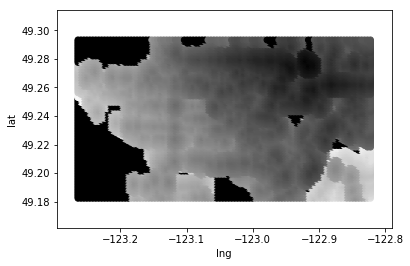

In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Plot
plt.scatter(lngs, lats, c=dis1)
plt.xlabel('lng')
plt.ylabel('lat')
plt.gray()
plt.show()

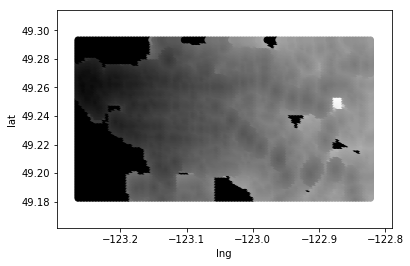

In [19]:
# Plot
plt.scatter(lngs, lats, c=dis2)
plt.xlabel('lng')
plt.ylabel('lat')
plt.gray()
plt.show()

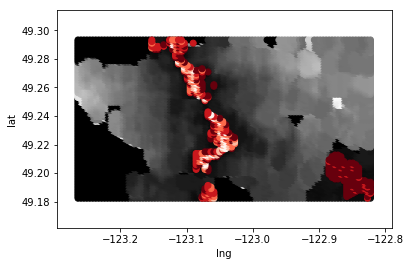

In [20]:
# Plot
plt.scatter(lngs, lats, c=dis3, cmap='gray')
plt.scatter(new_lngs, new_lats, c=dis5, cmap='Reds')
plt.xlabel('lng')
plt.ylabel('lat')
plt.show()

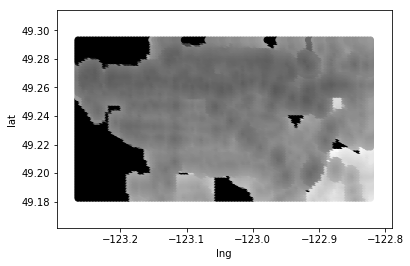

In [21]:
# Plot
plt.scatter(lngs, lats, c=dis4)
plt.xlabel('lng')
plt.ylabel('lat')
plt.gray()
plt.show()

In [22]:
sorted([(x,y,z, i, j) for (x,y,z, i, j) in zip(dis4, dis1, dis2, lats, lngs) if y > 10 and z>10])

[(77, 17, 60, 49.2607824, -122.96503616),
 (78, 19, 59, 49.25854436, -122.96503616),
 (78, 19, 59, 49.25966338, -122.96503616),
 (79, 15, 64, 49.25294926, -122.92042096),
 (79, 15, 64, 49.25294926, -122.91595944),
 (79, 15, 64, 49.25406828, -122.92042096),
 (79, 15, 64, 49.25406828, -122.91595944),
 (79, 17, 62, 49.26190142, -122.96503616),
 (80, 17, 63, 49.26190142, -122.96057464),
 (80, 18, 62, 49.2607824, -122.96057464),
 (80, 68, 12, 49.26749652, -123.21488128),
 (80, 68, 12, 49.2719726, -123.23718888),
 (81, 11, 70, 49.26302044, -122.88026728),
 (81, 11, 70, 49.26413946, -122.88026728),
 (81, 16, 65, 49.25183024, -122.92042096),
 (81, 16, 65, 49.25183024, -122.91595944),
 (81, 16, 65, 49.2551873, -122.92042096),
 (81, 16, 65, 49.2551873, -122.91595944),
 (81, 16, 65, 49.27980574, -122.97842072),
 (81, 18, 63, 49.26302044, -122.96503616),
 (81, 20, 61, 49.25742534, -122.96503616),
 (81, 20, 61, 49.25966338, -122.96057464),
 (81, 27, 54, 49.26525848, -123.01411288),
 (81, 32, 49, 49